In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/marco/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Análisis de los libros

In [3]:
b1 = pd.read_csv('Book1.csv')
b2 = pd.read_csv('Book2.csv')
b3 = pd.read_csv('Book3.csv')
b4 = pd.read_csv('Book4.csv')
b5 = pd.read_csv('Book5.csv')

In [5]:
books = [1, 2, 3, 4, 5]
mod_books = [len(b1['modularity_class'].unique()),
             len(b2['modularity_class'].unique()),
             len(b3['modularity_class'].unique()),
             len(b4['modularity_class'].unique()),
             len(b5['modularity_class'].unique())]

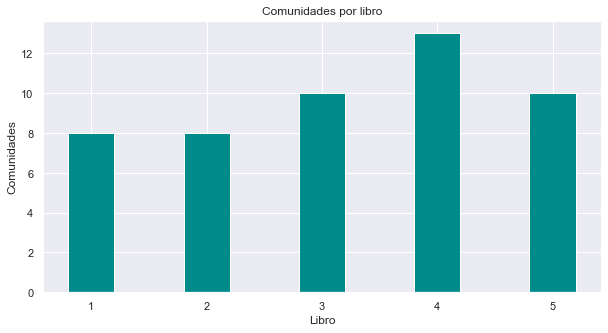

In [131]:
fig = plt.figure(figsize = (10, 5))
plt.bar(books, mod_books, color ='darkcyan',
        width = 0.4)
 
plt.xlabel('Libro')
plt.ylabel('Comunidades')
plt.title('Comunidades por libro')
plt.show()

### Grado medio de la red

In [7]:
deg_books = [b1['degree'].mean(),
             b2['degree'].mean(),
             b3['degree'].mean(),
             b4['degree'].mean(), 
             b5['degree'].mean()]

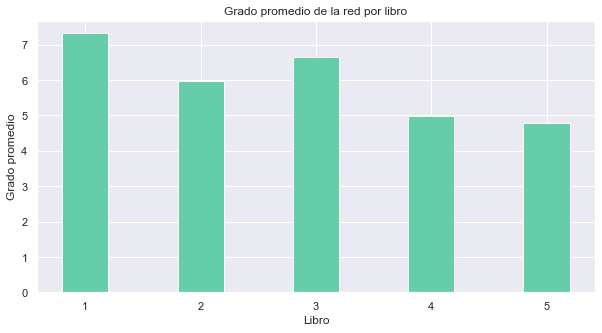

In [132]:
fig = plt.figure(figsize = (10, 5))
plt.bar(books, deg_books, color ='mediumaquamarine',
        width = 0.4)
 
plt.xlabel('Libro')
plt.ylabel('Grado promedio')
plt.title('Grado promedio de la red por libro')
#plt.grid()
plt.show()

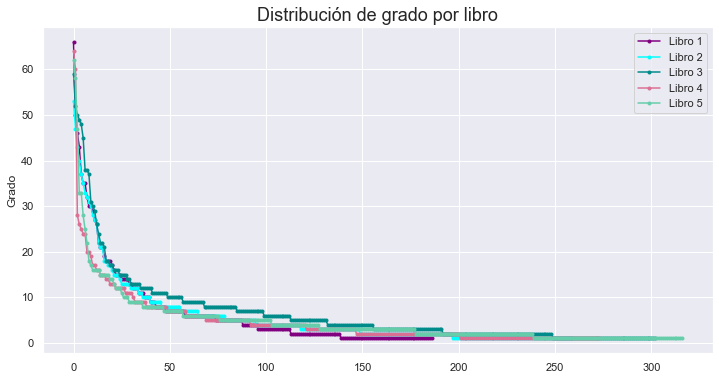

In [133]:
deg_seq_1 = sorted(b1['degree'], reverse=True)
deg_seq_2 = sorted(b2['degree'], reverse=True)
deg_seq_3 = sorted(b3['degree'], reverse=True)
deg_seq_4 = sorted(b4['degree'], reverse=True)
deg_seq_5 = sorted(b5['degree'], reverse=True)


fig = plt.figure(figsize = (12, 6))


plt.plot(deg_seq_1, marker='.', color='purple', label='Libro 1')
plt.plot(deg_seq_2, marker='.', color='cyan', label='Libro 2')
plt.plot(deg_seq_3, marker='.', color='darkcyan', label='Libro 3')
plt.plot(deg_seq_4, marker='.', color='palevioletred', label='Libro 4')
plt.plot(deg_seq_5, marker='.', color='mediumaquamarine', label='Libro 5')
plt.legend()
plt.title('Distribución de grado por libro', fontsize=18)
plt.ylabel('Grado')
plt.xlabel('')
plt.show()

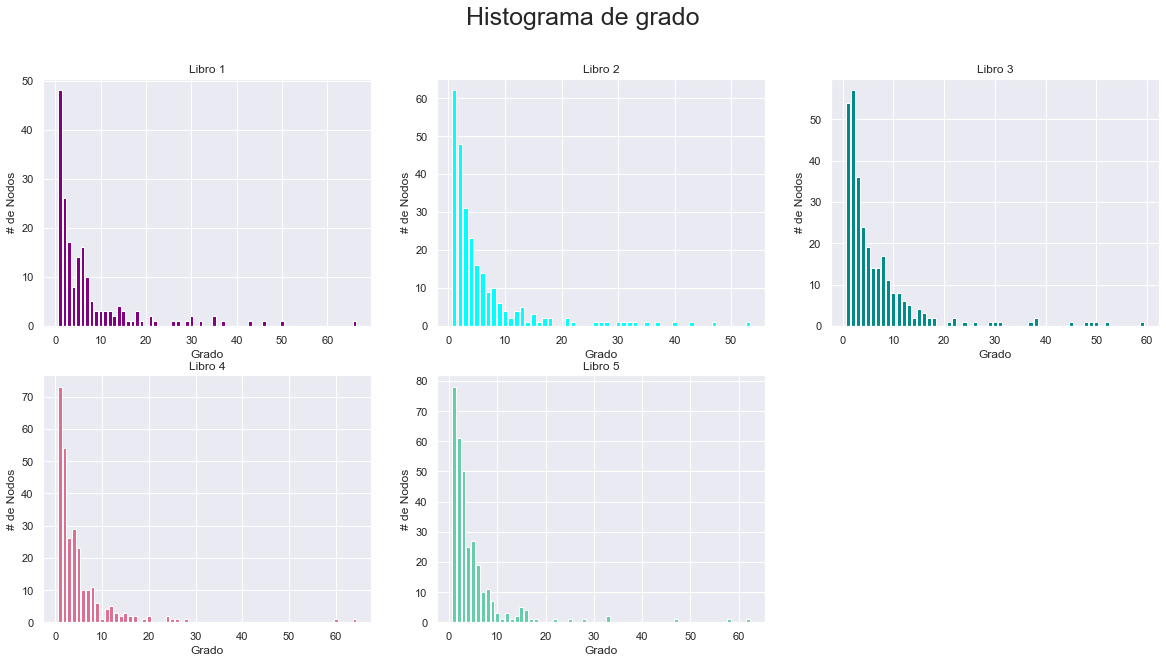

In [134]:
fig = plt.figure(figsize=(20,10))
plt.suptitle('Histograma de grado', fontsize=25)

fig.add_subplot(2, 3, 1)
plt.bar(*np.unique(deg_seq_1, return_counts=True), color='purple')
plt.title('Libro 1', fontsize=12)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(2, 3, 2)
plt.bar(*np.unique(deg_seq_2, return_counts=True), color='cyan')
plt.title('Libro 2', fontsize=12)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(2, 3, 3)
plt.bar(*np.unique(deg_seq_3, return_counts=True), color='darkcyan')
plt.title('Libro 3', fontsize=12)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(2, 3, 4)
plt.bar(*np.unique(deg_seq_4, return_counts=True), color='palevioletred')
plt.title('Libro 4', fontsize=12)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(2, 3, 5)
plt.bar(*np.unique(deg_seq_5, return_counts=True), color='mediumaquamarine')
plt.title('Libro 5', fontsize=12)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

plt.show()

### Top 5 de personajes más conectados por libro

In [11]:
b1 = b1.sort_values('pageranks', ascending=False).reset_index()
b2 = b2.sort_values('pageranks', ascending=False).reset_index()
b3 = b3.sort_values('pageranks', ascending=False).reset_index()
b4 = b4.sort_values('pageranks', ascending=False).reset_index()
b5 = b5.sort_values('pageranks', ascending=False).reset_index()

In [12]:
tops = pd.concat([b1[['Id']], b2[['Id']], b3[['Id']], b4[['Id']], b5[['Id']]], axis=1).head(5)
tops.columns = ['Libro 1', 'Libro 2', 'Libro 3', 'Libro 4', 'Libro 5']
tops.head()

,Libro 1,Libro 2,Libro 3,Libro 4,Libro 5
0,Eddard-Stark,Tyrion-Lannister,Tyrion-Lannister,Jaime-Lannister,Jon-Snow
1,Tyrion-Lannister,Theon-Greyjoy,Jon-Snow,Cersei-Lannister,Daenerys-Targaryen
2,Catelyn-Stark,Arya-Stark,Robb-Stark,Brienne-of-Tarth,Stannis-Baratheon
3,Robert-Baratheon,Joffrey-Baratheon,Sansa-Stark,Arya-Stark,Theon-Greyjoy
4,Jon-Snow,Stannis-Baratheon,Jaime-Lannister,Samwell-Tarly,Tyrion-Lannister


In [13]:
tops_names = pd.concat([tops['Libro 1'],tops['Libro 2'],tops['Libro 3'],tops['Libro 4'],tops['Libro 5']]).unique()

In [14]:
tops_names

array(['Eddard-Stark', 'Tyrion-Lannister', 'Catelyn-Stark',
       'Robert-Baratheon', 'Jon-Snow', 'Theon-Greyjoy', 'Arya-Stark',
       'Joffrey-Baratheon', 'Stannis-Baratheon', 'Robb-Stark',
       'Sansa-Stark', 'Jaime-Lannister', 'Cersei-Lannister',
       'Brienne-of-Tarth', 'Samwell-Tarly', 'Daenerys-Targaryen'],
      dtype=object)

In [67]:
for i in range(len(tops_names)):
    globals()[f'top_{i}'] = []
    for j in range(1,6):
        bb = globals()[f'b{j}'][globals()[f'b{j}']['Id'] == tops_names[i]]['pageranks'].reset_index()['pageranks']
        if (bb.empty == False):
            bn = globals()[f'b{j}'][globals()[f'b{j}']['Id'] == tops_names[i]]['pageranks'].reset_index()['pageranks'][0]
        else:
            bn = 0
        globals()[f'top_{i}'].append(bn)

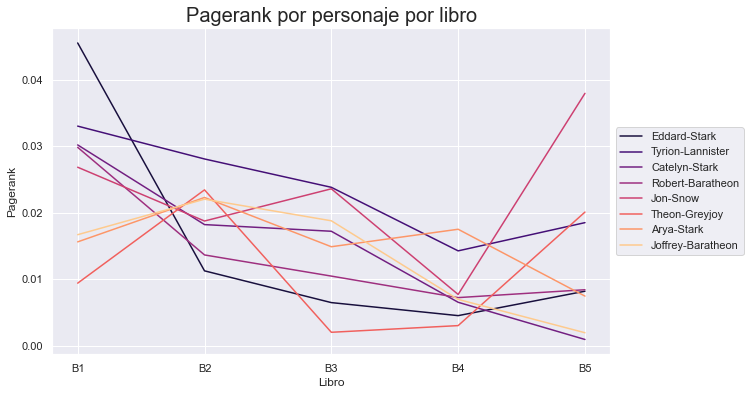

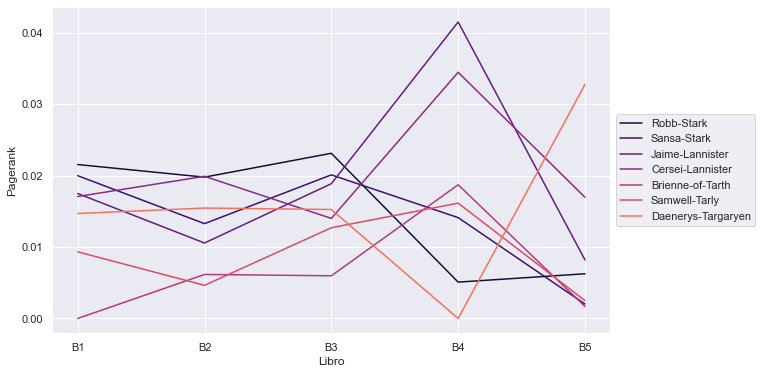

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))
pal = sns.color_palette('magma', 8).as_hex()

for i in range(0,8):
    plt.plot(globals()[f'top_{i}'], label=tops_names[i], color=pal[i])

plt.title('Pagerank por personaje por libro', fontsize=20)
plt.xlabel('Libro')
plt.ylabel('Pagerank')
plt.xticks(np.arange(0, 5, 1.0), ['B1','B2','B3','B4','B5'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
pal = sns.color_palette('magma', 9).as_hex()

for i in range(9,16):
    plt.plot(globals()[f'top_{i}'], label=tops_names[i], color=pal[i-9])

plt.xlabel('Libro')
plt.ylabel('Pagerank')
plt.xticks(np.arange(0, 5, 1.0), ['B1','B2','B3','B4','B5'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Análisis de las series

In [128]:
s1 = pd.read_csv('Season1.csv')
s2 = pd.read_csv('Season2.csv')
s3 = pd.read_csv('Season3.csv')
s4 = pd.read_csv('Season4.csv')
s5 = pd.read_csv('Season5.csv')
s6 = pd.read_csv('Season6.csv')
s7 = pd.read_csv('Season7.csv')
s8 = pd.read_csv('Season8.csv')

In [129]:
seasons = [1, 2, 3, 4, 5, 6, 7, 8]
mod_seasons = [len(s1['modularity_class'].unique()),
               len(s2['modularity_class'].unique()),
               len(s3['modularity_class'].unique()),
               len(s4['modularity_class'].unique()),
               len(s5['modularity_class'].unique()),
               len(s6['modularity_class'].unique()),
               len(s7['modularity_class'].unique()),
               len(s8['modularity_class'].unique())]

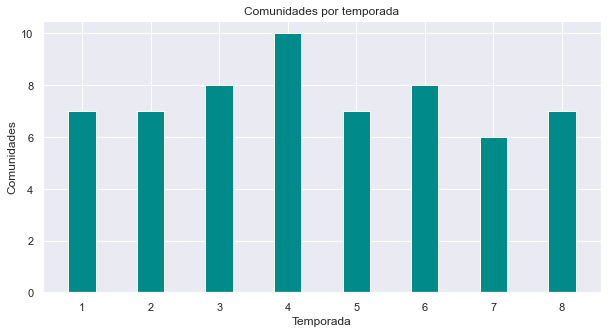

In [130]:
fig = plt.figure(figsize = (10, 5))
plt.bar(seasons, mod_seasons, color ='darkcyan',
        width = 0.4)
 
plt.xlabel('Temporada')
plt.ylabel('Comunidades')
plt.title('Comunidades por temporada')
plt.show()

### Grado medio de la red

In [135]:
deg_seasons = [s1['degree'].mean(),
               s2['degree'].mean(),
               s3['degree'].mean(),
               s4['degree'].mean(), 
               s5['degree'].mean(),
               s6['degree'].mean(),
               s7['degree'].mean(),
               s8['degree'].mean()]

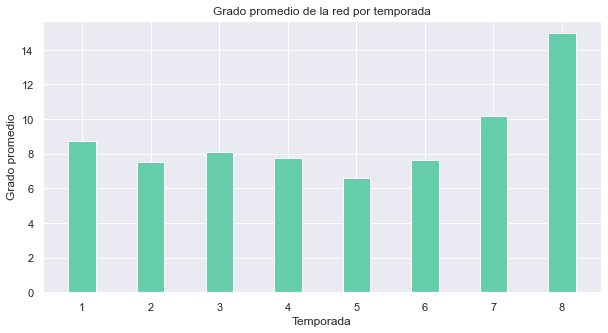

In [136]:
fig = plt.figure(figsize = (10, 5))
plt.bar(seasons, deg_seasons, color ='mediumaquamarine',
        width = 0.4)
 
plt.xlabel('Temporada')
plt.ylabel('Grado promedio')
plt.title('Grado promedio de la red por temporada')
plt.show()

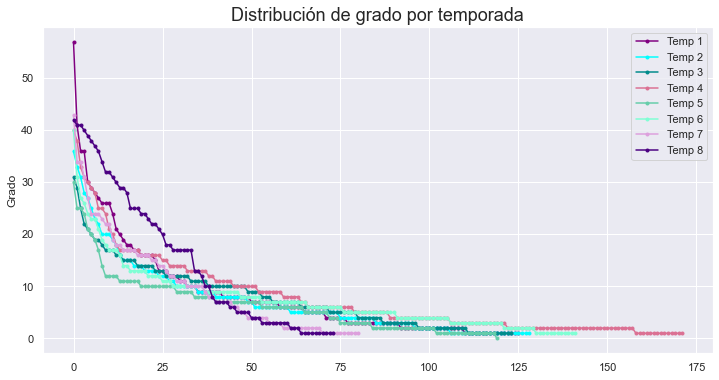

In [137]:
deg_seq_1 = sorted(s1['degree'], reverse=True)
deg_seq_2 = sorted(s2['degree'], reverse=True)
deg_seq_3 = sorted(s3['degree'], reverse=True)
deg_seq_4 = sorted(s4['degree'], reverse=True)
deg_seq_5 = sorted(s5['degree'], reverse=True)
deg_seq_6 = sorted(s6['degree'], reverse=True)
deg_seq_7 = sorted(s7['degree'], reverse=True)
deg_seq_8 = sorted(s8['degree'], reverse=True)



fig = plt.figure(figsize = (12, 6))


plt.plot(deg_seq_1, marker='.', color='purple', label='Temp 1')
plt.plot(deg_seq_2, marker='.', color='cyan', label='Temp 2')
plt.plot(deg_seq_3, marker='.', color='darkcyan', label='Temp 3')
plt.plot(deg_seq_4, marker='.', color='palevioletred', label='Temp 4')
plt.plot(deg_seq_5, marker='.', color='mediumaquamarine', label='Temp 5')
plt.plot(deg_seq_6, marker='.', color='aquamarine', label='Temp 6')
plt.plot(deg_seq_7, marker='.', color='plum', label='Temp 7')
plt.plot(deg_seq_8, marker='.', color='indigo', label='Temp 8')

plt.legend()
plt.title('Distribución de grado por temporada', fontsize=18)
plt.ylabel('Grado')
plt.xlabel('')
plt.show()

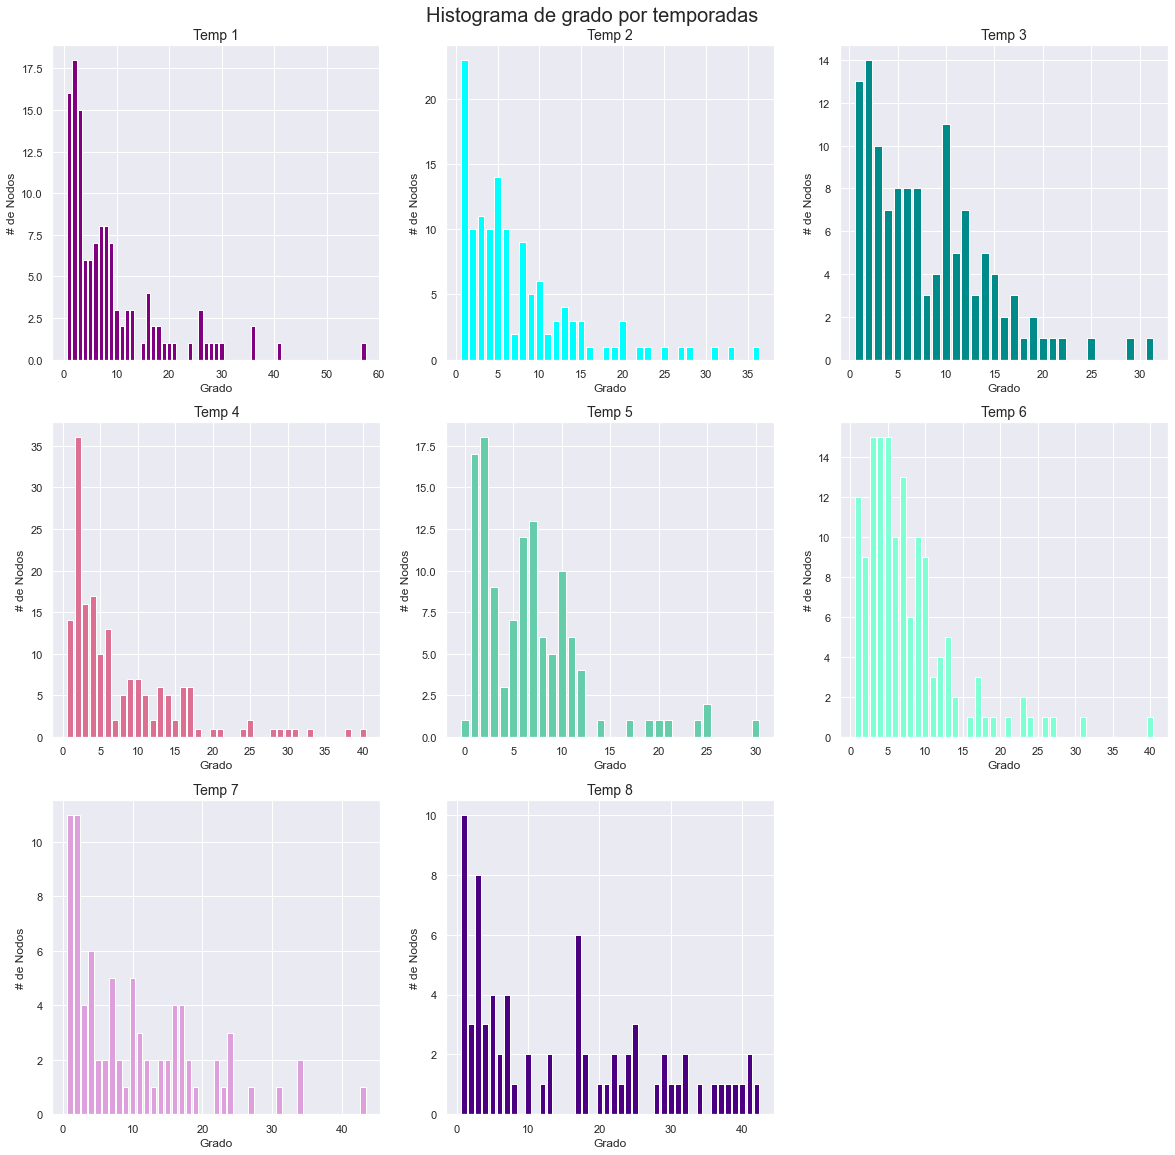

In [152]:
fig = plt.figure(figsize=(20,18))
fig.suptitle('Histograma de grado por temporadas', fontsize=20)
plt.subplots_adjust(top=0.95)

fig.add_subplot(3, 3, 1)
plt.bar(*np.unique(deg_seq_1, return_counts=True), color='purple')
plt.title('Temp 1', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 2)
plt.bar(*np.unique(deg_seq_2, return_counts=True), color='cyan')
plt.title('Temp 2', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 3)
plt.bar(*np.unique(deg_seq_3, return_counts=True), color='darkcyan')
plt.title('Temp 3', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 4)
plt.bar(*np.unique(deg_seq_4, return_counts=True), color='palevioletred')
plt.title('Temp 4', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 5)
plt.bar(*np.unique(deg_seq_5, return_counts=True), color='mediumaquamarine')
plt.title('Temp 5', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 6)
plt.bar(*np.unique(deg_seq_6, return_counts=True), color='aquamarine')
plt.title('Temp 6', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 7)
plt.bar(*np.unique(deg_seq_7, return_counts=True), color='plum')
plt.title('Temp 7', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

fig.add_subplot(3, 3, 8)
plt.bar(*np.unique(deg_seq_8, return_counts=True), color='indigo')
plt.title('Temp 8', fontsize=14)
plt.ylabel('# de Nodos')
plt.xlabel('Grado')

plt.show()

### Top 5 de personajes más conectados por temporada

In [153]:
s1 = s1.sort_values('pageranks', ascending=False).reset_index()
s2 = s2.sort_values('pageranks', ascending=False).reset_index()
s3 = s3.sort_values('pageranks', ascending=False).reset_index()
s4 = s4.sort_values('pageranks', ascending=False).reset_index()
s5 = s5.sort_values('pageranks', ascending=False).reset_index()
s6 = s6.sort_values('pageranks', ascending=False).reset_index()
s7 = s7.sort_values('pageranks', ascending=False).reset_index()
s8 = s8.sort_values('pageranks', ascending=False).reset_index()

In [154]:
tops = pd.concat([s1[['Id']], s2[['Id']], s3[['Id']], s4[['Id']], s5[['Id']],s6[['Id']], s7[['Id']], s8[['Id']]], axis=1).head(5)
tops.columns = ['Temp 1','Temp 2','Temp 3','Temp 4','Temp 5','Temp 6','Temp 7','Temp 8']
tops.head()

,Temp 1,Temp 2,Temp 3,Temp 4,Temp 5,Temp 6,Temp 7,Temp 8
0,TYRION,VARYS,TYWIN,VARYS,STANNIS,WUN_WUN,YARA,YOHN_ROYCE
1,YOREN,TYWIN,VARYS,TYWIN,TORMUND,TORMUND,YOHN_ROYCE,VARYS
2,VARYS,TYRION,WALDER,TYRION,TYRION,SANSA,VARYS,TYRION
3,TYWIN,THEON,TYRION,YGRITTE,VARYS,YARA,TYRION,MAESTER_WOLKAN
4,NED,TORRHEN,SAM,SAM,WALDA,VARYS,SANSA,TORMUND


In [155]:
tops_names = pd.concat([tops['Temp 1'],tops['Temp 2'],tops['Temp 3'],tops['Temp 4'],tops['Temp 5'],tops['Temp 6'],tops['Temp 7'],tops['Temp 8']]).unique()

In [156]:
tops_names

array(['TYRION', 'YOREN', 'VARYS', 'TYWIN', 'NED', 'THEON', 'TORRHEN',
       'WALDER', 'SAM', 'YGRITTE', 'STANNIS', 'TORMUND', 'WALDA',
       'WUN_WUN', 'SANSA', 'YARA', 'YOHN_ROYCE', 'MAESTER_WOLKAN'],
      dtype=object)

In [181]:
s1[s1['Id'] == tops_names[17]]['pageranks'].reset_index()['pageranks']

Series([], Name: pageranks, dtype: float64)

In [186]:
for i in range(len(tops_names)):
    globals()[f'top_{i}'] = []
    for j in range(1,9):
        bb = globals()[f's{j}'][globals()[f's{j}']['Id'] == tops_names[i]]['pageranks'].reset_index()['pageranks']
        if (bb.empty == False):
            bn = globals()[f's{j}'][globals()[f's{j}']['Id'] == tops_names[i]]['pageranks'].reset_index()['pageranks'][0]
        else:
            bn = 0
        globals()[f'top_{i}'].append(bn)

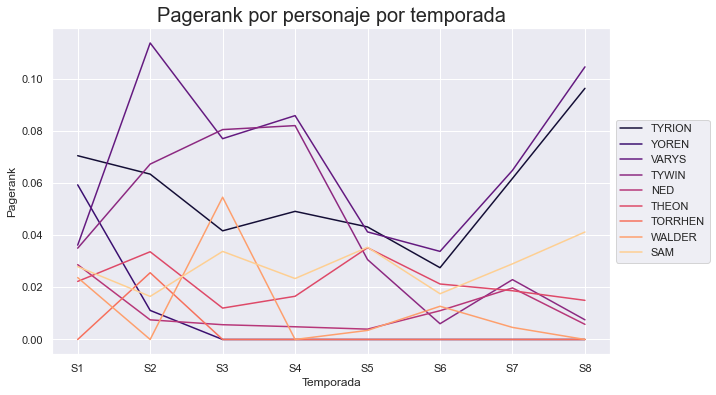

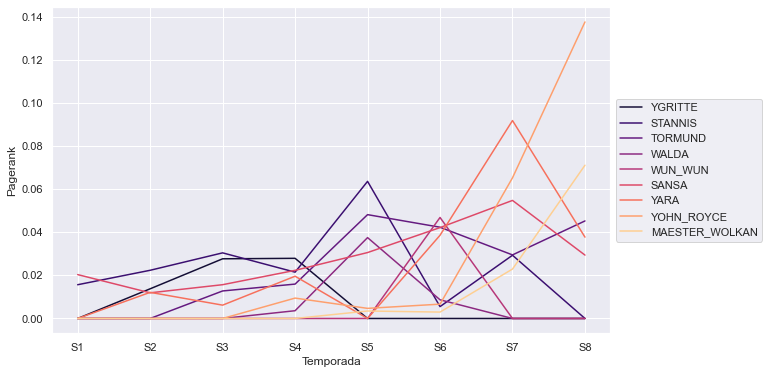

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))
pal = sns.color_palette('magma', 9).as_hex()

for i in range(0,9):
    plt.plot(globals()[f'top_{i}'], label=tops_names[i], color=pal[i])

plt.title('Pagerank por personaje por temporada', fontsize=20)
plt.xlabel('Temporada')
plt.ylabel('Pagerank')
plt.xticks(np.arange(0, 8, 1.0), ['S1','S2','S3','S4','S5','S6','S7','S8'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
pal = sns.color_palette('magma', 9).as_hex()

for i in range(9,18):
    plt.plot(globals()[f'top_{i}'], label=tops_names[i], color=pal[i-9])

plt.xlabel('Temporada')
plt.ylabel('Pagerank')
plt.xticks(np.arange(0, 8, 1.0), ['S1','S2','S3','S4','S5','S6','S7','S8'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()